In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [10]:
# Load the preprocessed CSV and preview the first few rows
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving telco_preprocessed.csv to telco_preprocessed.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [13]:
# Split data into features (X) and target (y), then perform train-test split
X = df.drop(columns=["Churn", "customerID"])   # independent variables
y = df["Churn"]                  # target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # keep class balance
)

X_train.shape, X_test.shape  # check split sizes

((5634, 19), (1409, 19))

Baseline Decision Tree Performance:
Accuracy : 0.730305180979418
Precision: 0.49238578680203043
Recall   : 0.5187165775401069
F1 Score : 0.5052083333333334


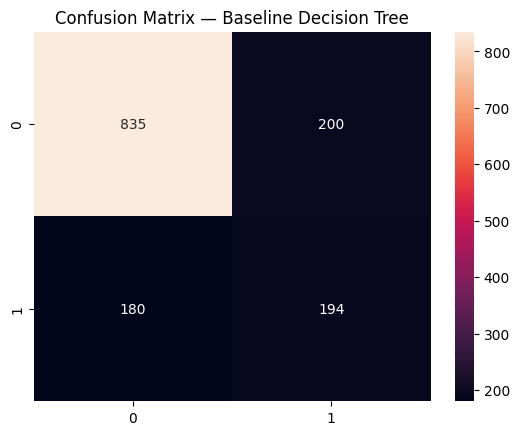

In [14]:
# Train a baseline Decision Tree model using default parameters
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)  # train the model

y_pred_dt = dt.predict(X_test)  # generate predictions

# Display evaluation metrics for baseline model
print("Baseline Decision Tree Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1 Score :", f1_score(y_test, y_pred_dt))

# Plot confusion matrix for baseline model
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d")
plt.title("Confusion Matrix — Baseline Decision Tree")
plt.show()

In [15]:
# Use GridSearchCV to find the best hyperparameters for the Decision Tree
param_grid = {
    "max_depth": [3, 5, 10, None],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 5, 10]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,          # 5-fold cross validation
    scoring="f1"   # optimise based on F1 score
)

dt_grid.fit(X_train, y_train)  # run the grid search
print("Best Parameters:", dt_grid.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


Tuned Decision Tree Performance:
Accuracy : 0.7842441447835344
Precision: 0.6017441860465116
Recall   : 0.553475935828877
F1 Score : 0.5766016713091922


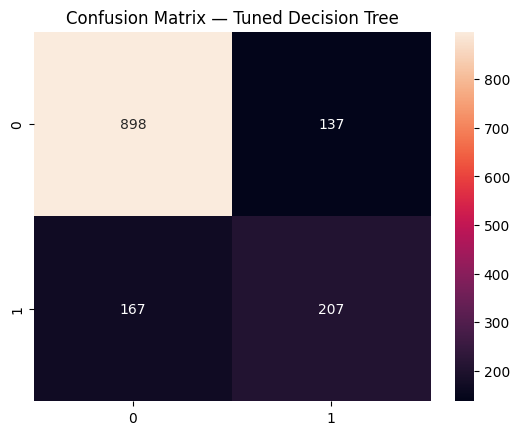

In [16]:
# Evaluate the Decision Tree model using the best parameters
best_dt = dt_grid.best_estimator_     # retrieve best model
y_pred_best_dt = best_dt.predict(X_test)  # generate predictions

# Display evaluation metrics for tuned model
print("Tuned Decision Tree Performance:")
print("Accuracy :", accuracy_score(y_test, y_pred_best_dt))
print("Precision:", precision_score(y_test, y_pred_best_dt))
print("Recall   :", recall_score(y_test, y_pred_best_dt))
print("F1 Score :", f1_score(y_test, y_pred_best_dt))

# Plot confusion matrix for tuned model
sns.heatmap(confusion_matrix(y_test, y_pred_best_dt), annot=True, fmt="d")
plt.title("Confusion Matrix — Tuned Decision Tree")
plt.show()


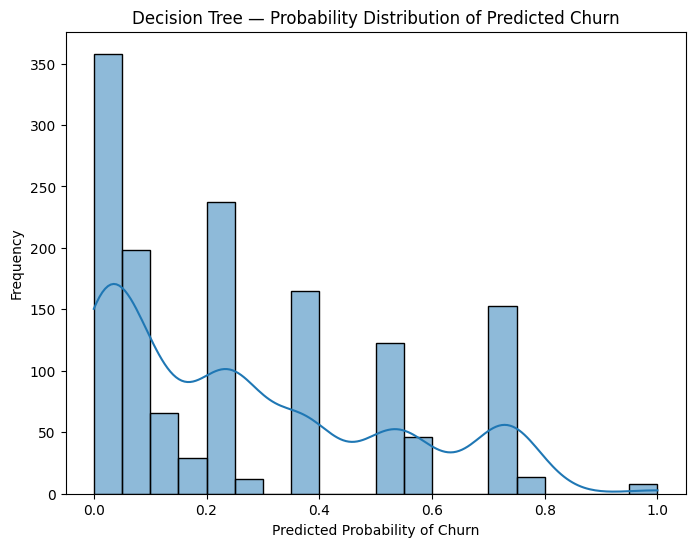

In [17]:
# Plot probability distribution of churn predictions from tuned model
dt_probs = best_dt.predict_proba(X_test)[:, 1]  # probabilities of class '1'

plt.figure(figsize=(8, 6))
sns.histplot(dt_probs, bins=20, kde=True)
plt.title("Decision Tree — Probability Distribution of Predicted Churn")
plt.xlabel("Predicted Probability of Churn")
plt.ylabel("Frequency")
plt.show()
